# (Exploring Suicide Rates Overview 1985 to 2016)
## by (Rawda Rumaieh)

## Investigation Overview

> My aim in this dataset is understanding the key reason behind the suicide rates between 1985 and 2016, how different features affected this trend the motive behind such thing and if there is a uniform pattern that we can notice that may help in decreasing the rates 

## Dataset Overview

> My dataset compares socio-economic info with suicid rates by year and country. It coveres the era from 1985 to 2016. with 12 columns covering features affecting the suicide rates and 27820 entries with almost no null values and about 2% of duplicates that I removed.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\a8\Documents\DSCourse\Project3\master.csv')
new_df=df[['country','year','sex','suicides/100k pop','gdp_per_capita ($)','generation','age']]
new_df.drop_duplicates()

,country,year,sex,suicides/100k pop,gdp_per_capita ($),generation,age
0,Albania,1987,male,6.71,796,Generation X,15-24 years
1,Albania,1987,male,5.19,796,Silent,35-54 years
2,Albania,1987,female,4.83,796,Generation X,15-24 years
3,Albania,1987,male,4.59,796,G.I. Generation,75+ years
4,Albania,1987,male,3.28,796,Boomers,25-34 years
...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,2.96,2309,Generation X,35-54 years
27816,Uzbekistan,2014,female,2.58,2309,Silent,75+ years
27817,Uzbekistan,2014,male,2.17,2309,Generation Z,5-14 years
27818,Uzbekistan,2014,female,1.67,2309,Generation Z,5-14 years


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of  Suicides per 100k population
>Suicides per 100k population in the dataset take on a very small range of values, from about 0.2 at the lowest, to about 12  at the highest. Plotted on a logarithmic scale, the distribution of diamond prices takes on a unimodal shape.

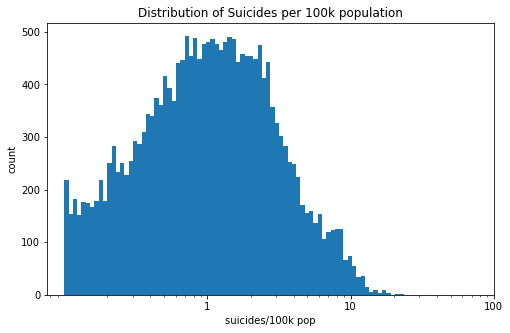

In [3]:
log_binsize = 0.03
bins = 10 ** np.arange(0, np.log10(df['suicides/100k pop'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x ='suicides/100k pop', bins = bins)
plt.xlabel('suicides/100k pop')
plt.title('Distribution of Suicides per 100k population')
plt.xscale('log')
plt.xlim([0, 10e2])
plt.ylabel('count')
plt.xticks([10e0, 10e1, 10e2], [1, 10, 100])
plt.show();


## Correlation between suicide Rates and GDP per Capita
> Contraty to my expectations, the correlation coefficient between suicides/100k pop and GDP per Capita s very low. Approaching zero which means that approximatly there are no relationship between gdp per capita and suicids per 100k population. I assumed that GDP per Capita will influence the suicide rate as GDP per capita measures the rate of prosperity of a country based on the economical growth therefore I believed that countries having a prospert life will tend to have less suidical rates.

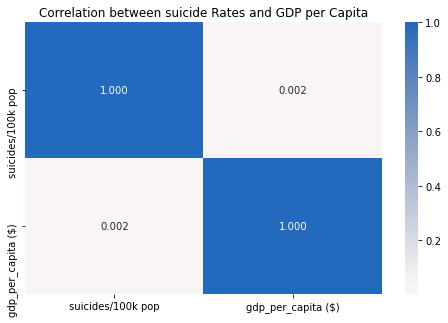

In [4]:
numeric_variables = ['suicides/100k pop', 'gdp_per_capita ($)']
categoric_variables = ['sex', 'generation','age']
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation between suicide Rates and GDP per Capita')
plt.show();

## Age bracket of each generation
> As I am interested in invistigating the suicidl rates between generations I wanted to understand each generation lies between which age bracket. We can see from this plot that old people are at Generation(GI) while younger people lies in Generation(Z)

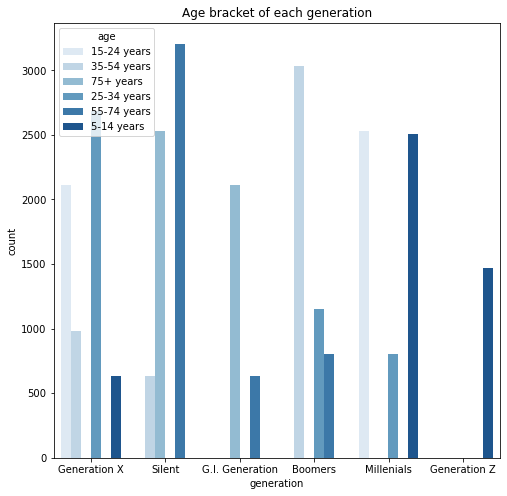

In [5]:
plt.figure(figsize = [8, 8])
ax = plt.subplot(1, 1, 1)
sb.countplot(data = new_df, x = 'generation', hue = 'age', palette = 'Blues')
plt.title('Age bracket of each generation');


## Generations with most suicide rates are of which gender?
> GI Generation was the most generation that committed suicide, and mostly they were males with a larger propotion than the females who committed suicide from the same generation which is the generation with older people

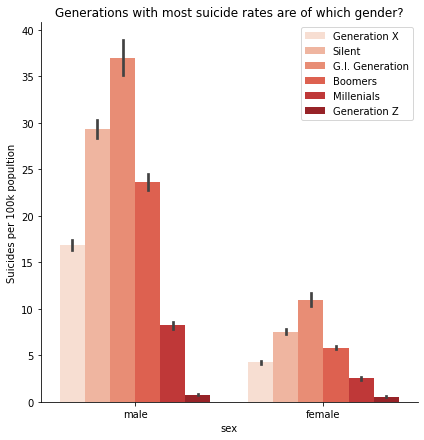

In [6]:
g = sb.factorplot("sex", "suicides/100k pop", "generation",
                   data=new_df, kind="bar",
                   size=6, palette="Reds",
                   legend=False)
g.despine(left=False)
plt.legend(loc='upper right')
g.set_ylabels("Suicides per 100k popultion")
plt.title('Generations with most suicide rates are of which gender?');


## The spread of suicide rates through the years in each country

> The most recent years incuded less suicide rates than old years. Some countries kept the number of suicide rates consistent. Those countries who had high rates consistently are worthy of further investigations 

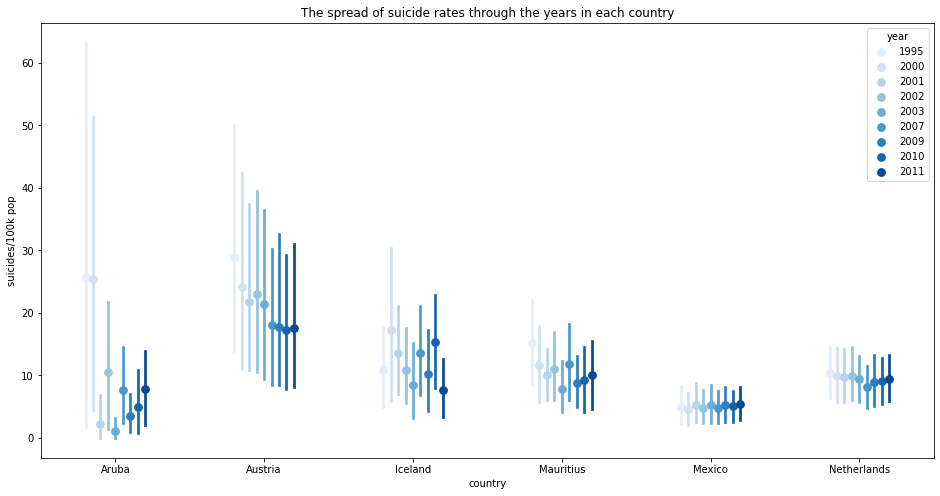

In [7]:
plt.figure(figsize = [16, 8])
Year=new_df.query('year=="2009" or year=="2010" or year=="2001"  or year=="2007"  or year=="2001"  or year=="2011"  or year=="2002" or year=="2003" or year=="2000" or year=="1995"')
YearandCountry=Year.query('country=="Mauritius" or country=="Iceland" or country=="Netherlands" or country=="Austria" or country=="Mexico" or country=="Aruba"')
YandC=['year','country']
sb.pointplot(data = YearandCountry, x = 'country', y = 'suicides/100k pop', hue = 'year',
             palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The spread of suicide rates through the years in each country');